# Polynomial Regression and Regularized Regression Exercise

**In this exercise you will:**
- Extend your Linear Regression model to produce non-linear regression lines/curve (more specifically polynomials)
- Include Regularization to reduce over-fitting. More specifically, Ridge Regression

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import csv
import math

plt.style.use('ggplot')
# Fix the seed of the random number 
# generator so that your results will match ours
np.random.seed(1)

%load_ext autoreload
%autoreload 2

# Dataset
For this notebook, we will use a toy dataset generated from a sin function so we know exactly what the optimal function should look like.

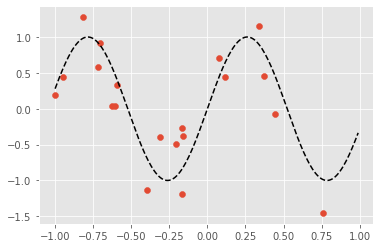

In [2]:
# Generate some sample data points
np.random.seed(1)
pts = 20
over_x = np.expand_dims(np.random.uniform(-1.0,1.0, pts),1)
over_y = np.sin(6*over_x) + np.random.randn(pts,1)*0.5

plt.scatter(over_x,over_y)

# plotting the optimal model
x_range_optimal = np.arange(-1,1,0.01)
y_range_optimal = np.sin(6*x_range_optimal)

plt.plot(x_range_optimal, y_range_optimal, 'k--')

The black dotted line is the function $f(x)=sin(6x)$ that generated the red dots (after some additional errors)

> Take note that in real world scenarios, we are talking about hundreds to millions of features. So, the ability to "look at the data and just draw the curve that feels right" is a luxury we can enjoy now with this small dataset. In real world data, this is not the case, and we most likely cannot visualize all features altogether in one graph.


It is clear that a line, no matter which way you change the slope to another direction, will still not do a great job. This is because we are forcing a line to model a sin function. We call this <span style="color:blue">**underfitting**</span> because we are not fitting the model to the data well. We also say that this model has <span style="color:blue">**high bias**</span>, because our estimate is far off the actual data. Look at the chart below:



 <img src="img/underfit.png" />

# Polynomial Regression
One way to remedy this is to increase the complexity of our hypothesis function through transformation. With polynomial feature transformation, we can generate more complex functions, and get a better fit of our dataset. 

### Pre-processing!
**Open `regularized_regression.py` and implement `poly_feature_transform`. Not only does it append a vector of ones for the bias term, it also introduces higher order polynomial terms depending on the parameter `poly_order`.**

In [22]:
from regularized_regression import RegularizedRegression

In [53]:
regressor = RegularizedRegression()
np.random.seed(1)
dummy_X = np.random.randn(5,3)
dummy_transformed_X_1 = regressor.poly_feature_transform(dummy_X, poly_order=1)
dummy_transformed_X_2 = regressor.poly_feature_transform(dummy_X, poly_order=2)
dummy_transformed_X_3 = regressor.poly_feature_transform(dummy_X, poly_order=3)

print("Before feature transform:")
print(dummy_X)
print("Shape:",dummy_X.shape)
print()
print("After feature transform (poly order = 1):")
print(dummy_transformed_X_1)
print("Shape:",dummy_transformed_X_1.shape)
print()
print("After feature transform (poly order = 2):")
print(dummy_transformed_X_2)
print("Shape:",dummy_transformed_X_2.shape)
print()
print("After feature transform (poly order = 3):")
print(dummy_transformed_X_3)
print("Shape:",dummy_transformed_X_3.shape)

Before feature transform:
[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069   0.3190391 ]
 [-0.24937038  1.46210794 -2.06014071]
 [-0.3224172  -0.38405435  1.13376944]]
Shape: (5, 3)

After feature transform (poly order = 1):
[[ 1.62434536 -0.61175641 -0.52817175  1.        ]
 [-1.07296862  0.86540763 -2.3015387   1.        ]
 [ 1.74481176 -0.7612069   0.3190391   1.        ]
 [-0.24937038  1.46210794 -2.06014071  1.        ]
 [-0.3224172  -0.38405435  1.13376944  1.        ]]
Shape: (5, 4)

After feature transform (poly order = 2):
[[ 1.62434536 -0.61175641 -0.52817175  2.63849786  0.37424591  0.2789654
   1.        ]
 [-1.07296862  0.86540763 -2.3015387   1.15126166  0.74893036  5.29708037
   1.        ]
 [ 1.74481176 -0.7612069   0.3190391   3.04436809  0.57943595  0.10178594
   1.        ]
 [-0.24937038  1.46210794 -2.06014071  0.06218558  2.13775962  4.24417974
   1.        ]
 [-0.3224172  -0.38405435  1.13376944  0.10395285  0.

**Sanity Check**: 

Expected output of the polynomial feature transform function.

```
Before feature transform:
[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069   0.3190391 ]
 [-0.24937038  1.46210794 -2.06014071]
 [-0.3224172  -0.38405435  1.13376944]]
Shape: (5, 3)

After feature transform (poly order = 1):
[[ 1.62434536 -0.61175641 -0.52817175  1.        ]
 [-1.07296862  0.86540763 -2.3015387   1.        ]
 [ 1.74481176 -0.7612069   0.3190391   1.        ]
 [-0.24937038  1.46210794 -2.06014071  1.        ]
 [-0.3224172  -0.38405435  1.13376944  1.        ]]
Shape: (5, 4)

After feature transform (poly order = 2):
[[ 1.62434536 -0.61175641 -0.52817175  2.63849786  0.37424591  0.2789654
   1.        ]
 [-1.07296862  0.86540763 -2.3015387   1.15126166  0.74893036  5.29708037
   1.        ]
 [ 1.74481176 -0.7612069   0.3190391   3.04436809  0.57943595  0.10178594
   1.        ]
 [-0.24937038  1.46210794 -2.06014071  0.06218558  2.13775962  4.24417974
   1.        ]
 [-0.3224172  -0.38405435  1.13376944  0.10395285  0.14749775  1.28543315
   1.        ]]
Shape: (5, 7)

After feature transform (poly order = 3):
[[  1.62434536  -0.61175641  -0.52817175   2.63849786   0.37424591
    0.2789654    4.28583177  -0.22894734  -0.14734164   1.        ]
 [ -1.07296862   0.86540763  -2.3015387    1.15126166   0.74893036
    5.29708037  -1.23526764   0.64813005 -12.19143546   1.        ]
 [  1.74481176  -0.7612069    0.3190391    3.04436809   0.57943595
    0.10178594   5.31184926  -0.44107064   0.0324737    1.        ]
 [ -0.24937038   1.46210794  -2.06014071   0.06218558   2.13775962
    4.24417974  -0.01550724   3.12563531  -8.74360747   1.        ]
 [ -0.3224172   -0.38405435   1.13376944   0.10395285   0.14749775
    1.28543315  -0.03351619  -0.05664715   1.45738482   1.        ]]
Shape: (5, 10)

```

### Train! Compute for the weights via closed form/analytical solution
**In `regularized_regression.py`, fill in the code for the function `train_analytic`, and `predict`. For now, ignore the `lambda_reg` parameter, we will incorporate that later on.**

Weight vector:
[[ 0.84215997]
 [-0.96338663]
 [-2.81534817]
 [ 0.11406516]]


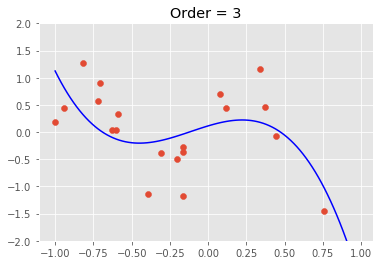

In [58]:
regressor = RegularizedRegression()
regressor.train_analytic(over_x,over_y,poly_order=3)
X_range = np.expand_dims(np.arange(-1.0,1.0,2/100),1)
y_range = regressor.predict(X_range)
plt.scatter(over_x,over_y)
plt.plot(X_range,y_range, "b")
plt.ylim(-2,2)
plt.title("Order = 3")

print("Weight vector:")
print(regressor.params['W'])

**Sanity Check**: 

Expected weights $W$.

```
Weight vector:
[[ 0.84215997]
 [-0.96338663]
 [-2.81534817]
 [ 0.11406516]]
```

We can see that the our hypothesis function is now showing cubic function. Let's see the effect of increasing the complexity of our hypothesis function; i.e., increasing the polynomial order.

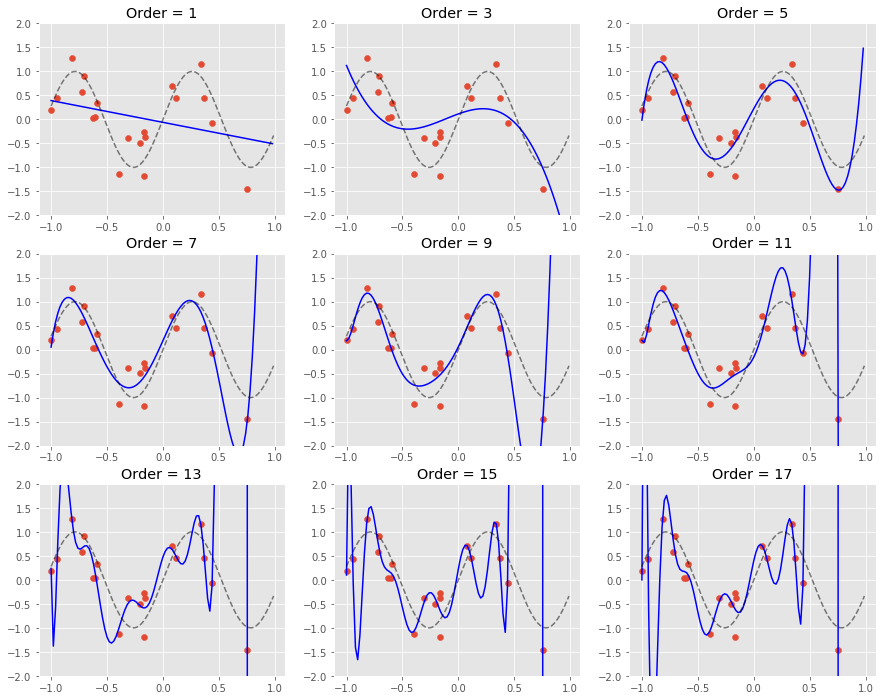

In [59]:
regressor = RegularizedRegression()

weights={}
plt.figure(figsize=(15,12))
for i in range(9):
    order = 2*i + 1
    regressor.train_analytic(over_x,over_y,poly_order=order)

    X_range = np.expand_dims(np.arange(-1.0,1.0,2/100),1)
    y_range = regressor.predict(X_range)
    plt.subplot(3,3,i+1)
    plt.scatter(over_x,over_y)
    plt.plot(X_range,y_range, "b")
    plt.ylim(-2,2)
    plt.title("Order = " + str(order))
    
    weights[order] = regressor.params['W']
    plt.plot(x_range_optimal, y_range_optimal, 'k--',alpha=0.5)

Look at the generated models with higher orders. It definitely got a lot of data correct, but we know that this is not the sin wave function where the data actually came from.

You may also notice that it dipped/peaked into some points that are unneccessary. It has freedom to this as long as the data it wants to target are met.

We call this <span style="color:blue">**overfitting**</span>, because while it will work well with this particular set of data, it might do badly with other unseen data points. Overfitting gives us a low training error (good!), but a high test error (bad!). This is because it didn't generalize well.

So even if it does model our data well with a higher degree, our data is also inherently noisy which causes the model to look this way. With that said, a more complex function will fit the noise better as well. 

In [60]:
for i in range(9):
    idx = 2*i + 1
    length = weights[idx].shape[0]
    curweights = weights[idx]
    print("order =", idx)
    for weight in curweights:
        print(str(weight),end="\t")
    print()
    print()

order = 1
[-0.45357374]	[-0.06083896]	

order = 3
[0.84215997]	[-0.96338663]	[-2.81534817]	[0.11406516]	

order = 5
[4.25329442]	[-3.08889246]	[-19.77155833]	[3.95461998]	[16.61910183]	[0.2207104]	

order = 7
[5.20274861]	[0.26704928]	[-27.43834249]	[-19.5669467]	[18.42570777]	[30.90656847]	[15.54792189]	[0.18494853]	

order = 9
[4.82514018]	[6.70179564]	[-15.24034867]	[-72.09828341]	[-63.55331514]	[145.85627826]	[178.71508382]	[-72.85791217]	[-97.27336173]	[0.05838273]	

order = 11
[4.69289745]	[25.56735451]	[43.60662331]	[-259.31982003]	[-886.07156137]	[242.18223972]	[3429.46809451]	[2865.95165661]	[-2586.74807138]	[-4605.4379387]	[-1736.35595409]	[-0.15894656]	

order = 13
[6.88487916]	[-47.80551107]	[-270.48278631]	[1141.85747762]	[5518.11139988]	[-7292.70602756]	[-45059.14766968]	[-4797.08280878]	[140185.01935531]	[125847.03020283]	[-97886.31404384]	[-176315.60660787]	[-63958.14791562]	[0.47477762]	

order = 15
[12.66402048]	[-34.17674234]	[-703.49108062]	[272.17959357]	[13174.438

We can see that the weights of the model with polynomial order = 17 are orders of magnitude larger than the model with polynomial order = 3.

### Now let's try it on the gradient descent solution.

**In `regularized_regression.py`, implement the following functions:**
- `initialize_weights`
- `loss`
- `train`

It should be the same with the previous assignment on Linear Regression

**Note: Ignore the the parameter lambda_reg for now, we will include it later on.**

Weight vector:
[[  3.66210965]
 [ -2.82887195]
 [-13.29268421]
 [  3.80986767]
 [  1.71515421]
 [  0.8398426 ]
 [  5.35130437]
 [ -1.1191464 ]
 [  4.81923714]
 [ -1.3389015 ]
 [  3.08785639]
 [ -0.49759083]
 [  1.02425301]
 [  0.92366167]
 [ -1.02343876]
 [  2.55520453]
 [ -3.01965823]
 [  0.18169391]]


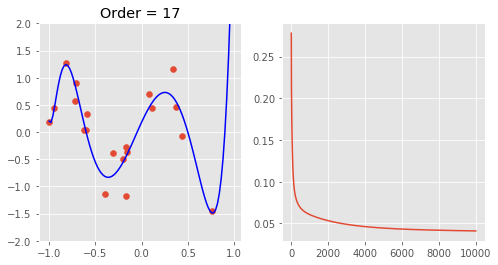

In [61]:
regressor = RegularizedRegression()
np.random.seed(1)
plt.figure(figsize=(8,4))

loss_history = regressor.train(over_x,over_y,poly_order=17,learning_rate=1.1,num_iters=10000)

X_range = np.expand_dims(np.arange(-1.0,1.0,2/100),1)
y_range = regressor.predict(X_range)
plt.subplot(1,2,1)
plt.scatter(over_x,over_y)
plt.plot(X_range,y_range, "b")
plt.ylim(-2,2)
plt.title("Order = 17")
    
plt.subplot(1,2,2)
plt.plot(loss_history)

print("Weight vector:")
print(regressor.params['W'])

**Sanity Check**: 

Expected weights $W$.

```
Weight vector:
[[  3.66210965]
 [ -2.82887195]
 [-13.29268421]
 [  3.80986767]
 [  1.71515421]
 [  0.8398426 ]
 [  5.35130437]
 [ -1.1191464 ]
 [  4.81923714]
 [ -1.3389015 ]
 [  3.08785639]
 [ -0.49759083]
 [  1.02425301]
 [  0.92366167]
 [ -1.02343876]
 [  2.55520453]
 [ -3.01965823]
 [  0.18169391]]
```

How come the solution is still well behaved? 

If you will look at the weights of the analytic solution at order = 17, some of the magnitudes are in the order of $10^5$. We are initializing our weights to be around $10^{-2}$, and every update is a small step towards the optimal solution. It will take a very long time for gradient descent to reach the same answer as the analytic solution. If you want to know more about this behavior search for literature on *implicit regularization*. You can try to modify the weights initialization to a much larger value and you will see that the functions will start to be wilder.

## Regularized Regression

As the order of our hypothesis function increases, we are able to generate more complex functions and get a better fit of our dataset. However, our data is inherently noisy and more complex functions fit noise better as well. 

To prevent overfitting, we add a regularization term in our loss function that penalizes large weights. 

**Modify your implementation of `train_analytical` function to include $L_2$ regularization.**

Hint: $(X^TX)^{-1} => (X^TX + \lambda I)^{-1}$ where $\lambda$ is the regularization coefficient that controls how much you penalize large weights.

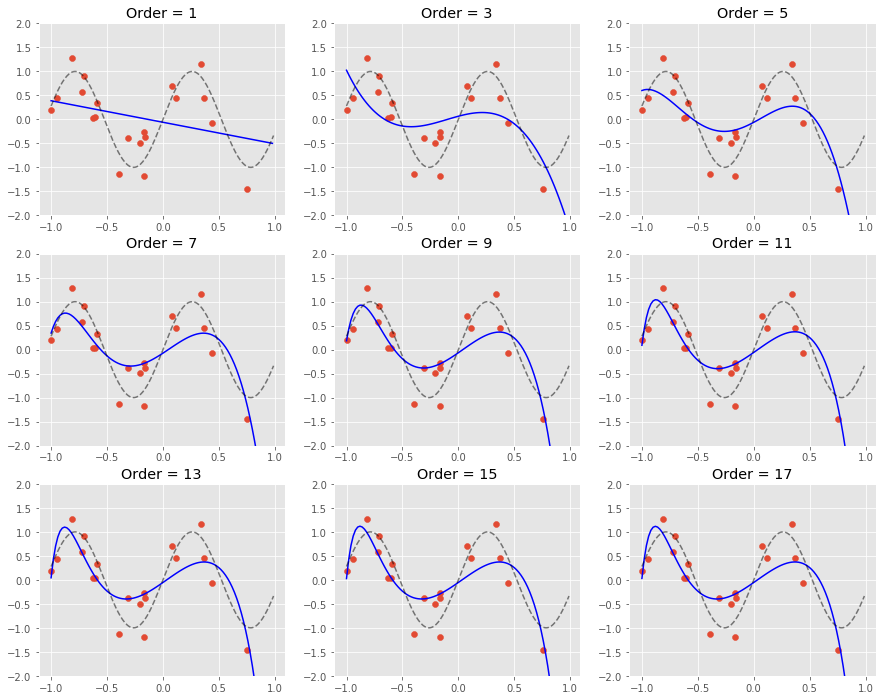

In [82]:
regressor = RegularizedRegression()
    
weights={}
    
plt.figure(figsize=(15,12))
for i in range(9):
    order = 2*i + 1
    regressor.train_analytic(over_x,over_y,poly_order=order,lambda_reg=0.05)
    X_range = np.expand_dims(np.arange(-1.0,1.0,2/100),1)
    y_range = regressor.predict(X_range)
    plt.subplot(3,3,i+1)
    plt.scatter(over_x,over_y)
    plt.plot(X_range,y_range, "b")
    plt.ylim(-2,2)
    plt.title("Order = " + str(order))
    weights[order] = regressor.params['W']

    plt.plot(x_range_optimal, y_range_optimal, 'k--',alpha=0.5)

In [83]:
for i in range(9):
    idx = 2*i + 1
    length = weights[idx].shape[0]
    curweights = weights[idx]
    print("order =", idx)
    for weight in curweights:
        print(str(weight),end="\t")
    print()
    print()

order = 1
[-0.4486202]	[-0.05937566]	

order = 3
[0.6235059]	[-0.71939875]	[-2.30221007]	[0.06582113]	

order = 5
[1.24112442]	[1.03232305]	[-4.39945598]	[-2.68683672]	[0.84027246]	[-0.06107957]	

order = 7
[1.52356038]	[0.80065646]	[-4.53217155]	[-0.76149416]	[-1.08317214]	[-2.34360019]	[1.36797296]	[-0.07387634]	

order = 9
[1.61300761]	[0.54660529]	[-4.33625202]	[-0.28079276]	[-1.64597931]	[-1.25016518]	[0.18536439]	[-1.79275075]	[1.15537026]	[-0.06567512]	

order = 11
[1.62878277]	[0.42955622]	[-4.17273986]	[-0.20792035]	[-1.76695785]	[-0.90851918]	[-0.23039595]	[-1.2083724]	[0.49655744]	[-1.23665026]	[0.76311008]	[-0.05876149]	

order = 13
[1.62485869]	[0.39489285]	[-4.08928028]	[-0.22451957]	[-1.76705735]	[-0.82956633]	[-0.34713495]	[-1.02262311]	[0.26974652]	[-0.95341296]	[0.44154774]	[-0.75019763]	[0.3829582]	[-0.05561562]	

order = 15
[1.62112146]	[0.39075192]	[-4.06252472]	[-0.23832257]	[-1.75477919]	[-0.8216589]	[-0.36585905]	[-0.98393614]	[0.21776962]	[-0.88377457]	[0.35875

**Sanity Check**: 

```
order = 1
[-0.4486202]	[-0.05937566]	

order = 3
[ 0.6235059]	[-0.71939875]	[-2.30221007]	[ 0.06582113]	

order = 5
[ 1.24112442]	[ 1.03232305]	[-4.39945598]	[-2.68683672]	[ 0.84027246]	[-0.06107957]	

order = 7
[ 1.52356038]	[ 0.80065646]	[-4.53217155]	[-0.76149416]	[-1.08317214]	[-2.34360019]	[ 1.36797296]	[-0.07387634]	

order = 9
[ 1.61300761]	[ 0.54660529]	[-4.33625202]	[-0.28079276]	[-1.64597931]	[-1.25016518]	[ 0.18536439]	[-1.79275075]	[ 1.15537026]	[-0.06567512]	

order = 11
[ 1.62878277]	[ 0.42955622]	[-4.17273986]	[-0.20792035]	[-1.76695785]	[-0.90851918]	[-0.23039595]	[-1.2083724]	[ 0.49655744]	[-1.23665026]	[ 0.76311008]	[-0.05876149]	

order = 13
[ 1.62485869]	[ 0.39489285]	[-4.08928028]	[-0.22451957]	[-1.76705735]	[-0.82956633]	[-0.34713495]	[-1.02262311]	[ 0.26974652]	[-0.95341296]	[ 0.44154774]	[-0.75019763]	[ 0.3829582]	[-0.05561562]	

order = 15
[ 1.62112146]	[ 0.39075192]	[-4.06252472]	[-0.23832257]	[-1.75477919]	[-0.8216589]	[-0.36585905]	[-0.98393614]	[ 0.21776962]	[-0.88377457]	[ 0.35875931]	[-0.65228379]	[ 0.27293439]	[-0.36477232]	[ 0.07650277]	[-0.05483464]	

order = 17
[ 1.62209274]	[ 0.39083754]	[-4.06393028]	[-0.233149]	[-1.75742168]	[-0.81818179]	[-0.3659769]	[-0.98471801]	[ 0.22181705]	[-0.88949343]	[ 0.36742106]	[-0.66288098]	[ 0.286126]	[-0.3799179]	[ 0.09392481]	[-0.080347]	[-0.14692737]	[-0.05498183]	
```

We can see that the learned models are more well behaved even at higher orders. 

Let's do the same for the gradient descent approach.

**Modify your implementation of `loss` function to include $L_2$ regularization.**

Weight vector:
[[ 1.16909827]
 [ 0.28496586]
 [-3.02590419]
 [-0.20696395]
 [-1.5283569 ]
 [-0.55036286]
 [-0.49987679]
 [-0.65717011]
 [ 0.01085529]
 [-0.62759877]
 [ 0.21684787]
 [-0.52959185]
 [ 0.25758976]
 [-0.4008975 ]
 [ 0.21171751]
 [-0.26155844]
 [ 0.12279446]
 [-0.05889166]]


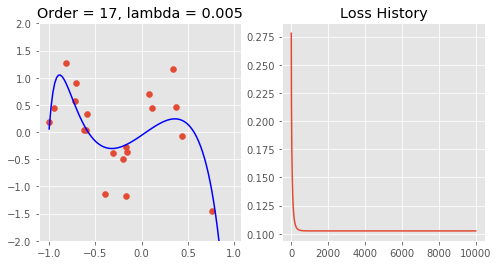

In [144]:
regressor = RegularizedRegression()
np.random.seed(1)
plt.figure(figsize=(8,4))

loss_history = regressor.train(over_x,over_y,poly_order=17,lambda_reg=0.005, learning_rate=1.1, num_iters=10000)

X_range = np.expand_dims(np.arange(-1.0,1.0,2/100),1)
y_range = regressor.predict(X_range)
plt.subplot(1,2,1)
plt.scatter(over_x,over_y)
plt.plot(X_range,y_range, "b")
plt.ylim(-2,2)
plt.title("Order = 17, lambda = 0.005")
    
plt.subplot(1,2,2)
plt.plot(loss_history)
plt.title('Loss History')

print("Weight vector:")
print(regressor.params['W'])

**Sanity Check:**
```
Weight vector:
[[ 1.16909827]
 [ 0.28496586]
 [-3.02590419]
 [-0.20696395]
 [-1.5283569 ]
 [-0.55036286]
 [-0.49987679]
 [-0.65717011]
 [ 0.01085529]
 [-0.62759877]
 [ 0.21684787]
 [-0.52959185]
 [ 0.25758976]
 [-0.4008975 ]
 [ 0.21171751]
 [-0.26155844]
 [ 0.12279446]
 [-0.05889166]]
```

The difference is not that obvious for $\lambda=0.005$, let us try to vary it and see how it affects the learned model.

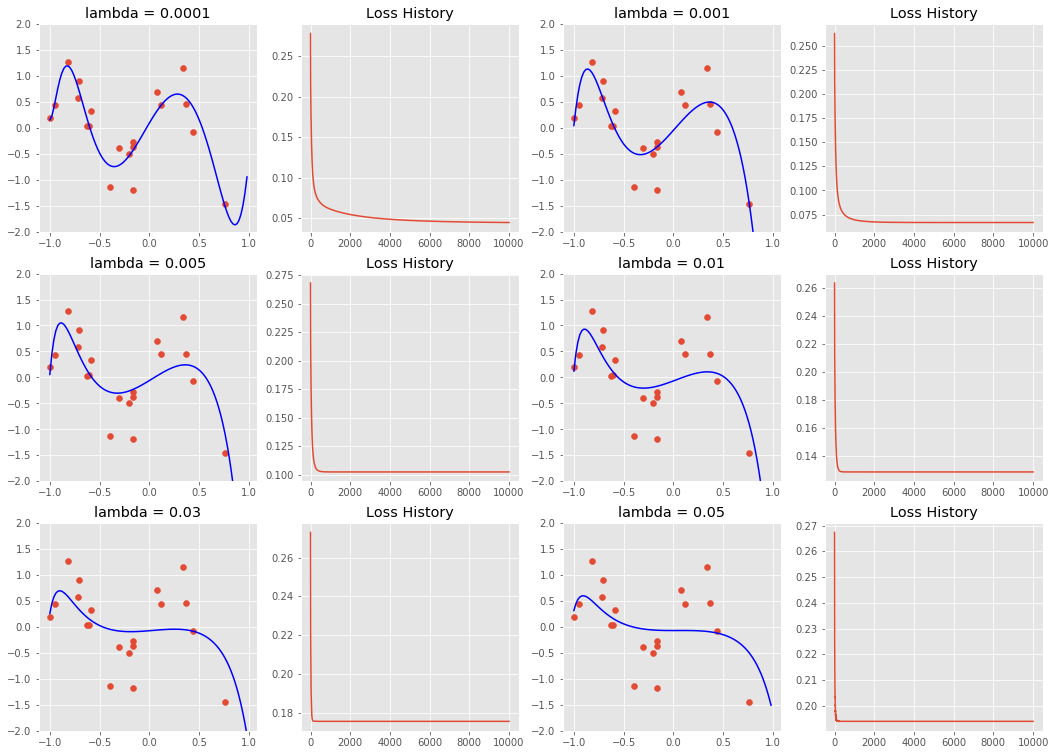

In [145]:
regressor = RegularizedRegression()
np.random.seed(1)
lambda_reg_list = [0.0001,0.001, 0.005, 0.01, 0.03, 0.05]
plt_ctr = 1
plt.figure(figsize=(18,13))
for reg in lambda_reg_list:

    loss_history = regressor.train(over_x,over_y,poly_order=17,lambda_reg=reg, learning_rate=1.1, num_iters=10000)

    X_range = np.expand_dims(np.arange(-1.0,1.0,2/100),1)
    y_range = regressor.predict(X_range)
    plt.subplot(3,4,plt_ctr)
    plt.scatter(over_x,over_y)
    plt.plot(X_range,y_range, "b")
    plt.ylim(-2,2)
    plt.title("lambda = "+str(reg))
    plt_ctr += 1
    plt.subplot(3,4,plt_ctr)
    plt.plot(loss_history)
    plt.title('Loss History')
    plt_ctr += 1

We can see that the regression curve becomes flatter as the regularization strength increases.

## Another way of preventing overfitting

In class, we discussed that having more data points will prevent overfitting. Let's see what solutions we'll end up with if we have much more data points.

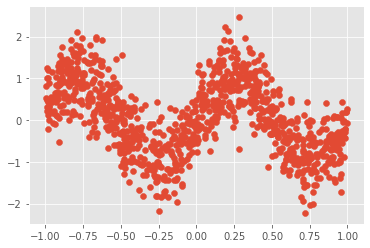

In [146]:
pts = 1000
over_x_many = np.expand_dims(np.random.uniform(-1.0,1.0, pts),1)
over_y_many = np.sin(6*over_x_many) + np.random.randn(pts,1)*0.5

plt.scatter(over_x_many,over_y_many)

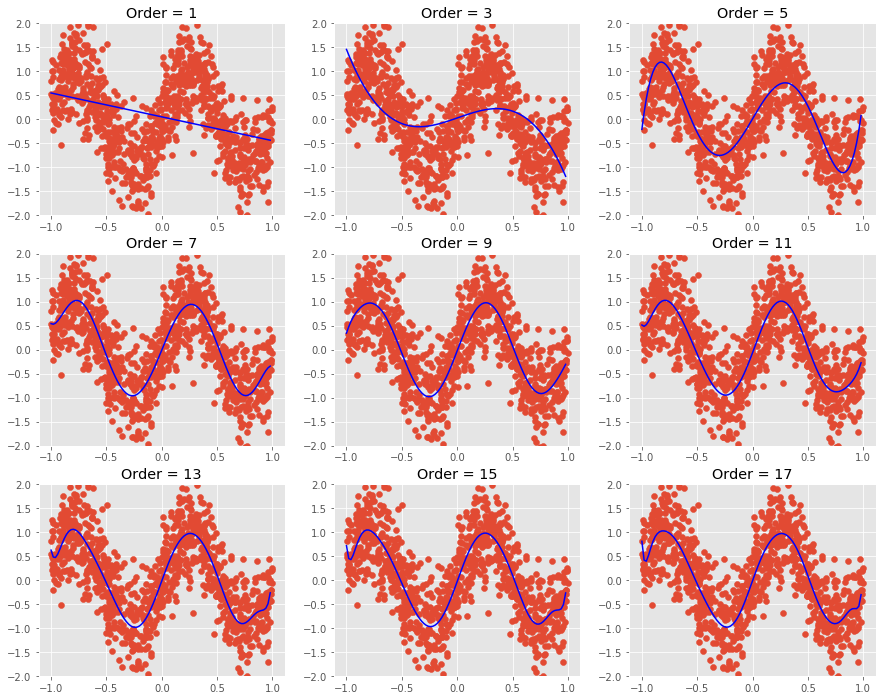

In [147]:
regressor = RegularizedRegression()

plt.figure(figsize=(15,12))
for i in range(9):
    order = 2*i + 1
    regressor.train_analytic(over_x_many,over_y_many,poly_order=order,lambda_reg=0)

    X_range = np.expand_dims(np.arange(-1.0,1.0,2/100),1)
    y_range = regressor.predict(X_range)
    plt.subplot(3,3,i+1)
    plt.scatter(over_x_many,over_y_many)
    plt.plot(X_range,y_range,"b")
    plt.ylim(-2,2)
    plt.title("Order = " + str(order))

As you can see, even without regularization, the more data we have, our model is more consistent and less likely to overfit. This suggests that overfitting is relative to the **complexity** of the hypothesis function as well as the **number of data points** in your training set.

# Summary

Congratulations!

You have now created a linear regression model that can fit a complex function that is robust to the problem of overfitting. 

<img src="http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png">
In the figure above, we want to be where the error is the lowest

To **summarize**:
* We definitely do not want to underfit, so we allow feature transform to properly capture data
* But we don't want to overfit either by doing feature transform, so we must make sure that we don't overfit by keeping an eye on the weights.
* We do this by updating our loss function to also consider large weights (weights far from zero) as additional loss
* Weights now update to make sure that training error is minimal and weights be as close to 0 as possible.



Next, we will move on to logistic regression, which builds on top of linear regression. Unlike linear regression, logistic regression is a classification technique.

See you in the next notebook!

### <center>fin</center>